# Extract L-matrix from xs covariance matrix 

In [4]:
import sandy

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [30]:
err = 1  # xs reconstruction tolerance, very poor for fast results
mt = [2, 4, 18, 102]  # considered reactions

# ERRORR parameters
ek_errorr = [2e-5, 5.4e-1, 2.26033e1, 2.03468e3, 6.73795e4, 4.97871e5, 2.23130e6, 1.96403e7]  # energy groups in eV
iwt_errorr = 2  # constant

## Plot L-matrix for correlated reactions (Pu-239)

In [37]:
tape = sandy.get_endf6_file("jeff_33", "xs", 942390)
errorr = tape.get_errorr(
    err=err, mt=mt,
    ek_errorr=ek_errorr, iwt_errorr=iwt_errorr,
    mubar=False, chi=False, nubar=False,  # keep only xs
)
C = errorr.get_cov()

In [38]:
tolerance = 0  # truncate eigenvalues < 0 if any is found
L = C.get_L(tolerance=tolerance)

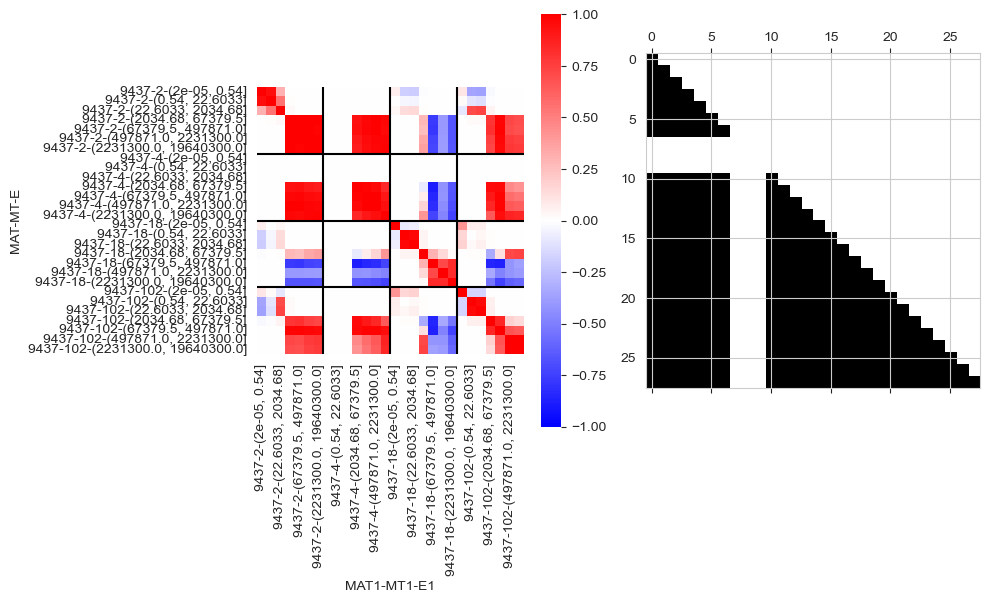

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=100)

ax = axs[0]
ax.set_aspect("equal")
sns.heatmap(C.get_corr().data, vmin=-1, vmax=1, cmap="bwr", ax=ax)
ax.axhline(7, color='k')
ax.axvline(7, color='k')
ax.axhline(7 * 2, color='k')
ax.axvline(7 * 2, color='k')
ax.axhline(7 * 3, color='k')
ax.axvline(7 * 3, color='k')

ax = axs[1]
ax.set_aspect("equal")
ax.spy(L)

fig.tight_layout();

## Plot L-matrix for uncorrelated reactions (Pu-241)

In [40]:
tape = sandy.get_endf6_file("jeff_33", "xs", 942410)
errorr = tape.get_errorr(
    err=err, mt=mt,
    ek_errorr=ek_errorr, iwt_errorr=iwt_errorr,
    mubar=False, chi=False, nubar=False,  # keep only xs
)
C = errorr.get_cov()

In [41]:
tolerance = 0  # truncate eigenvalues < 0 if any is found
L = C.get_L(tolerance=tolerance)

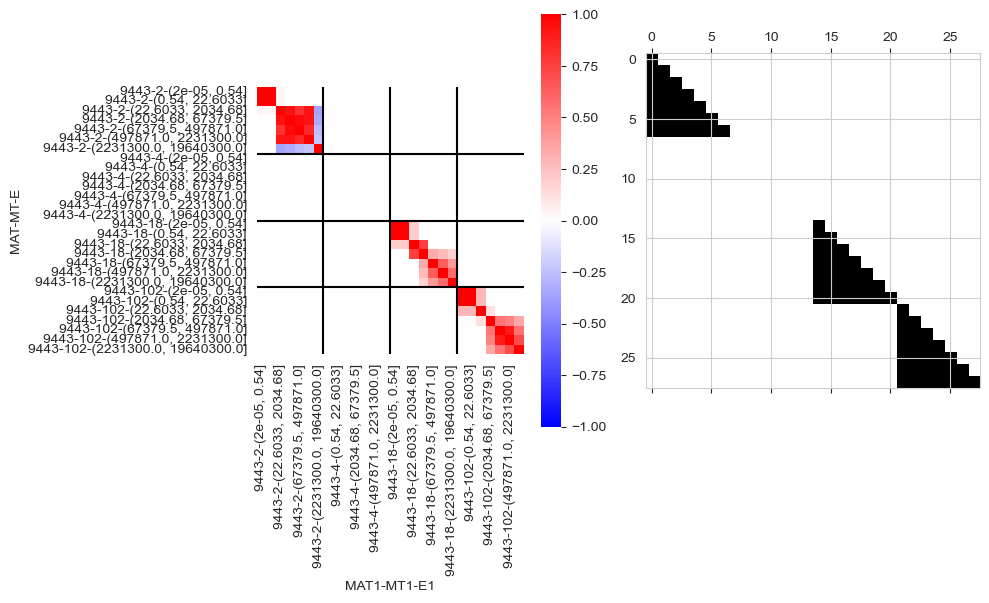

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=100)

ax = axs[0]
ax.set_aspect("equal")
sns.heatmap(C.get_corr().data, vmin=-1, vmax=1, cmap="bwr", ax=ax)
ax.axhline(7, color='k')
ax.axvline(7, color='k')
ax.axhline(7 * 2, color='k')
ax.axvline(7 * 2, color='k')
ax.axhline(7 * 3, color='k')
ax.axvline(7 * 3, color='k')

ax = axs[1]
ax.set_aspect("equal")
ax.spy(L)

fig.tight_layout();